In [2]:
import pandas as pd
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pyregion

In [1]:


def gaussian(x, A, mu, sigma):
    return A * np.exp(-(x - mu)**2 / (2 * sigma**2))

def perp_line(m, x1, y1, x): 
    y = m*(x-x1) + y1 
    return y 

def per_star(r, image, num): 
    
    width = 16
    
    y = round(r[num].coord_list[0])
    x = round(r[num].coord_list[1])

    cutout = image[0].data[x-width:x+width,y-width:y+width]
    rows, cols = np.where(cutout>1)
    fit = np.polyfit(rows, cols, 2)
    f = np.poly1d(fit)

    starlist = []
    
    x_vals = range(round(cutout.shape[0]/2-5),round(cutout.shape[0]/2+5))
    
    for x_val in x_vals: 

        deriv = f.deriv()
        slope_of_normal = -1/deriv(x_val)
        y1 = f(x_val)
        x1= x_val
        xr = range(x_val-8,x_val+12)

        y = [round(perp_line(slope_of_normal, x1, y1, x)) for x in xr]
        y = [31 if a >= 32 else 0 if a <= 0 else a for a in y]
        #plt.scatter(xr, y, marker ='x')
        coords = list(zip(xr,y))
        crosscut = [cutout[c[0],c[1]] for c in coords]
        
        try:
            popt, _ = curve_fit(gaussian, xr, crosscut, p0=[1, 0, 1])

            # Calculate the FWHM from the fitted parameters
            fwhm = 2 * np.sqrt(2 * np.log(2)) * popt[2]
            maxy = max(crosscut)
            rsum = sum(crosscut)-maxy
            rstd = np.std(crosscut)
            rmean = np.mean(crosscut)
            maxy2 = sorted(crosscut)[-2]
            numg0 = sum(i > 1 for i in crosscut)            
            numge1 = sum(i >= 1 for i in crosscut)


        except: 
            fwhm = 999
            
        row = {'star': num, 
               'x_val': x_val, 
               'fwhm': fwhm, 
               'maxy': maxy,
               'maxy2': maxy2,
               'crosscut': crosscut, 
               'rsum': rsum,
              'rmean': rmean,
              'rstd': rstd,
              'numg0': numg0,
              'numge1': numge1} 
        
        starlist.append(row.copy())

        
    star_data = pd.DataFrame(starlist)
    
    return star_data 
        
def per_eclipse(eclipse, time, timer): 
    
    image = fits.open(f"/media/bekah/BekahA/backplane_widths/e{eclipse}/e{eclipse}-nd-b00-f0025-t00{time}0-g_dose.fits.gz")
    region_name = f"/media/bekah/BekahA/backplane_widths/e{eclipse}/regions_n_t{timer}.reg"
    r = pyregion.open(region_name)
    
    combined_results = []

    for star in range(len(r)): 
        try: 
            star_data = per_star(r, image, star)
            combined_results.append(star_data)
        except: 
            print("Poor fit.")
        
    eclipse_results = pd.concat(combined_results, axis=0)
    eclipse_results['eclipse'] = eclipse
    eclipse_results['time'] = timer

    return eclipse_results 

def all_data(dlist): 
    
    combined_results = []
    
    for d in dlist: 
        df = per_eclipse(d[0], d[1], d[2])
        combined_results.append(df)
        
                    
    return combined_results 


In [3]:
dlist = [('23068', '25', '25'), ('23068', '50', '50'),
            ('23068', '75', '75'), ('23068', '00', '0'), 
           ('23258', '25', '25'), ('23258', '50', '50'),
            ('23258', '75', '75'), ('23258', '00', '0'),
        ('23328','25', '25'),('23328','50', '50') ]

cresults = all_data(dlist)

df = pd.concat(cresults, axis=0)

/home/bekah/mambaforge/envs/gphoton2/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)


Poor fit.
Poor fit.


/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)


Poor fit.
Poor fit.


/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)


Poor fit.
Poor fit.
Poor fit.
Poor fit.
Poor fit.


/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/home/bekah/mambaforge/envs/gphoton2/lib/python3.10/site-packages/numpy/lib/polynomial.py:667: RuntimeWarning: invalid value encountered in divide
  lhs /= scale
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = pe

Poor fit.
Poor fit.
Poor fit.
Poor fit.
Poor fit.


/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/home/bekah/mambaforge/envs/gphoton2/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)


Poor fit.
Poor fit.
Poor fit.


/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_5

Poor fit.
Poor fit.
Poor fit.
Poor fit.
Poor fit.


/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/home/bekah/mambaforge/envs/gphoton2/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:486: RuntimeWarning: overflow encountered in matmul
  cov_x = invR @ invR.T
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)


Poor fit.
Poor fit.
Poor fit.
Poor fit.


/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/home/bekah/mambaforge/envs/gphoton2/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_5670/9

Poor fit.
Poor fit.
Poor fit.
Poor fit.


/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_5

Poor fit.
Poor fit.
Poor fit.
Poor fit.
Poor fit.


/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_5

Poor fit.
Poor fit.
Poor fit.
Poor fit.


/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/home/bekah/mamb

Poor fit.
Poor fit.
Poor fit.
Poor fit.
Poor fit.
Poor fit.
Poor fit.
Poor fit.
Poor fit.
Poor fit.
Poor fit.
Poor fit.
Poor fit.
Poor fit.
Poor fit.
Poor fit.
Poor fit.
Poor fit.
Poor fit.
Poor fit.
Poor fit.
Poor fit.
Poor fit.
Poor fit.
Poor fit.
Poor fit.
Poor fit.
Poor fit.
Poor fit.
Poor fit.
Poor fit.
Poor fit.
Poor fit.
Poor fit.
Poor fit.
Poor fit.
Poor fit.
Poor fit.
Poor fit.
Poor fit.
Poor fit.
Poor fit.
Poor fit.
Poor fit.
Poor fit.
Poor fit.
Poor fit.
Poor fit.
Poor fit.
Poor fit.
Poor fit.
Poor fit.
Poor fit.
Poor fit.
Poor fit.
Poor fit.
Poor fit.
Poor fit.
Poor fit.
Poor fit.
Poor fit.
Poor fit.
Poor fit.
Poor fit.
Poor fit.
Poor fit.
Poor fit.
Poor fit.
Poor fit.
Poor fit.
Poor fit.
Poor fit.
Poor fit.
Poor fit.


/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_5

Poor fit.
Poor fit.
Poor fit.
Poor fit.
Poor fit.
Poor fit.
Poor fit.
Poor fit.
Poor fit.
Poor fit.
Poor fit.
Poor fit.
Poor fit.
Poor fit.
Poor fit.
Poor fit.
Poor fit.
Poor fit.
Poor fit.
Poor fit.
Poor fit.
Poor fit.
Poor fit.
Poor fit.
Poor fit.
Poor fit.
Poor fit.
Poor fit.
Poor fit.
Poor fit.
Poor fit.
Poor fit.
Poor fit.
Poor fit.
Poor fit.
Poor fit.
Poor fit.
Poor fit.
Poor fit.
Poor fit.


/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/home/bekah/mambaforge/envs/gphoton2/lib/python3.10/site-packages/numpy/lib/polynomial.py:667: RuntimeWarning: invalid value encountered in divide
  lhs /= scale
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/home/bekah/mambaforge/envs/gphoton2/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_5670/932250615.py:27: RuntimeWarning: divide by zero encountered in scalar divide
  slope_of_normal = -1/deriv(x_val)
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data

Poor fit.
Poor fit.


/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/home/bekah/mambaforge/envs/gphoton2/lib/python3.10/site-packages/numpy/lib/polynomial.py:667: RuntimeWarning: invalid value encountered in divide
  lhs /= scale
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)


Poor fit.
Poor fit.
Poor fit.
Poor fit.
Poor fit.


/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/home/bekah/mambaforge/envs/gphoton2/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:486: RuntimeWarning: overflow encountered in matmul
  cov_x = invR @ invR.T


Poor fit.


/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_5

Poor fit.
Poor fit.
Poor fit.
Poor fit.
Poor fit.
Poor fit.
Poor fit.


/home/bekah/mambaforge/envs/gphoton2/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)


Poor fit.


/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/home/bekah/mambaforge/envs/gphoton2/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:486: RuntimeWarning: overflow encountered in matmul
  cov_x = invR @ invR.T
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)


Poor fit.


/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/home/bekah/mambaforge/envs/gphoton2/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_5670/9

Poor fit.
Poor fit.


/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)


Poor fit.


/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)


Poor fit.
Poor fit.


/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/home/bekah/mambaforge/envs/gphoton2/lib/python3.10/site-packages/numpy/lib/polynomial.py:667: RuntimeWarning: invalid value encountered in divide
  lhs /= scale
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = pe

Poor fit.


/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/home/bekah/mambaforge/envs/gphoton2/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_5670/9

Poor fit.
Poor fit.
Poor fit.
Poor fit.
Poor fit.


/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)


Poor fit.
Poor fit.
Poor fit.
Poor fit.


/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)


Poor fit.
Poor fit.
Poor fit.


/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_5

Poor fit.
Poor fit.
Poor fit.


/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/home/bekah/mambaforge/envs/gphoton2/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_5670/9

Poor fit.
Poor fit.


/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)


Poor fit.
Poor fit.


/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)


Poor fit.
Poor fit.
Poor fit.


/home/bekah/mambaforge/envs/gphoton2/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:486: RuntimeWarning: overflow encountered in matmul
  cov_x = invR @ invR.T
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/home/bekah/mambaforge/envs/gphoton2/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)


Poor fit.
Poor fit.
Poor fit.
Poor fit.
Poor fit.
Poor fit.
Poor fit.


/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)


Poor fit.
Poor fit.
Poor fit.
Poor fit.


/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_5670/932250615.py:84: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)


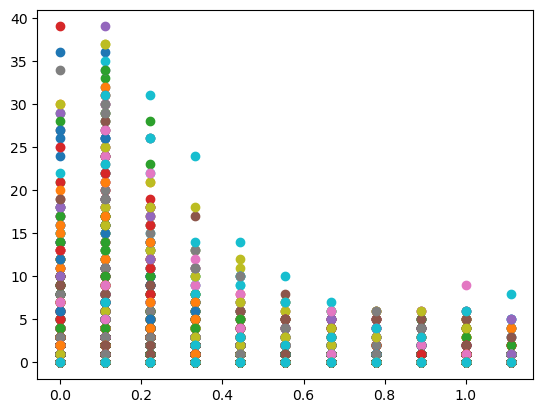

In [31]:
length = len(results)
norm = [abs((c-9)/9) for c in range(20)]

length = len(results)
for x in range(length): 
    plt.scatter(norm,results['crosscut'].iloc[x])
    
length = len(results1)
for x in range(length): 
    plt.scatter(norm,results1['crosscut'].iloc[x])
    
length = len(results2)
for x in range(length): 
    plt.scatter(norm,results2['crosscut'].iloc[x])
    


In [5]:
results

,star,x_val,fwhm,maxy,crosscut
0,0,11,2.35482,1.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ..."
1,0,12,2.35482,2.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 2.0, ..."
2,0,13,2.35482,1.0,"[0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, ..."
3,0,14,2.35482,4.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, ..."
4,0,15,2.35482,1.0,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, ..."
...,...,...,...,...,...
5,136,16,2.35482,1.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ..."
6,136,17,2.35482,1.0,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ..."
7,136,18,2.35482,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
8,136,19,2.35482,1.0,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


(array([   8., 1269.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          23.]),
 array([-181.55383837,  -63.49845453,   54.55692931,  172.61231314,
         290.66769698,  408.72308082,  526.77846465,  644.83384849,
         762.88923233,  880.94461616,  999.        ]),
 <BarContainer object of 10 artists>)

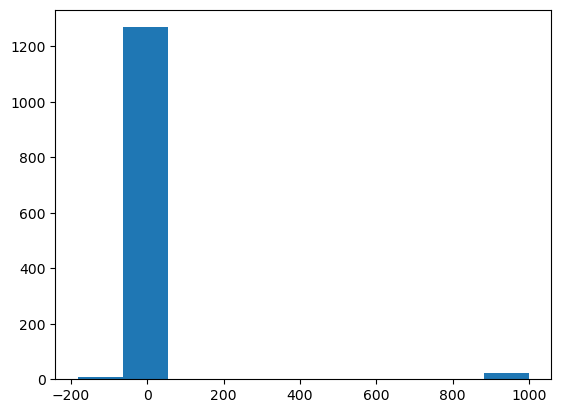

In [8]:
plt.hist(results['fwhm'])

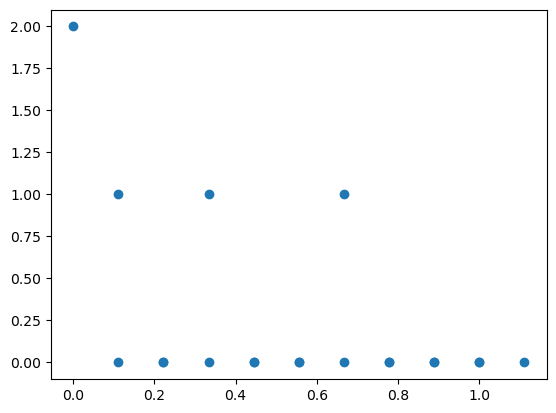

In [23]:
norm = [abs((c-9)/9) for c in range(20)]

plt.scatter(norm,results['crosscut'].iloc[128])

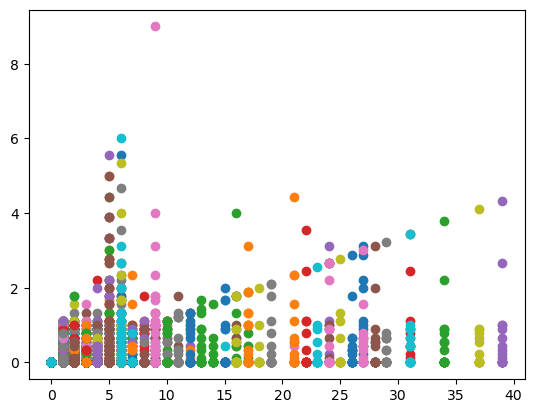

In [40]:
length = len(results2)
for x in range(length): 
    rmax = [max(results2['crosscut'].iloc[x])]*20
    plt.scatter(rmax, np.array(norm)*np.array(results2['crosscut'].iloc[x]))
    

In [34]:
type(norm)

list

In [39]:
len(np.array(norm)*np.array(results2['crosscut'].iloc[x]))

20

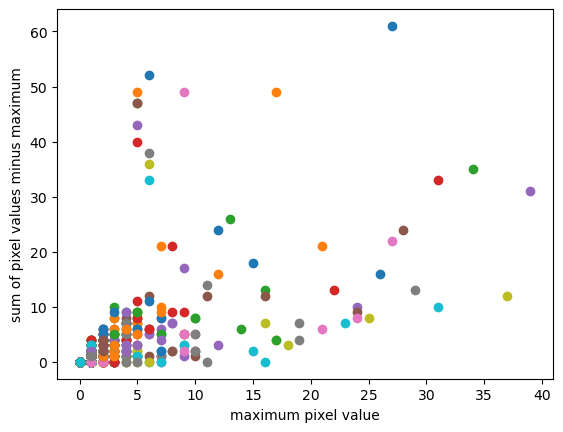

In [42]:
length = len(results2)
for x in range(length): 
    rmax = max(results2['crosscut'].iloc[x])
    rsum = sum(results2['crosscut'].iloc[x])-rmax
    plt.scatter(rmax, rsum)
    plt.xlabel("maximum pixel value")
    plt.ylabel("sum of pixel values minus maximum")

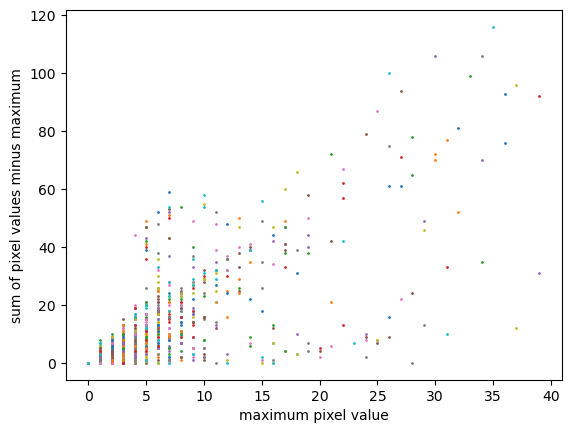

In [44]:

length = len(results)
for x in range(length): 
    rmax = max(results['crosscut'].iloc[x])
    rsum = sum(results['crosscut'].iloc[x])-rmax
    plt.scatter(rmax, rsum, s=1)
    
length = len(results1)
for x in range(length): 
    rmax = max(results1['crosscut'].iloc[x])
    rsum = sum(results1['crosscut'].iloc[x])-rmax
    plt.scatter(rmax, rsum, s=1)
length = len(results2)
for x in range(length): 
    rmax = max(results2['crosscut'].iloc[x])
    rsum = sum(results2['crosscut'].iloc[x])-rmax
    plt.scatter(rmax, rsum, s=1)
    
    plt.xlabel("maximum pixel value")
    plt.ylabel("sum of pixel values minus maximum")


Text(0.5, 1.0, 'cross cut star path in dose maps')

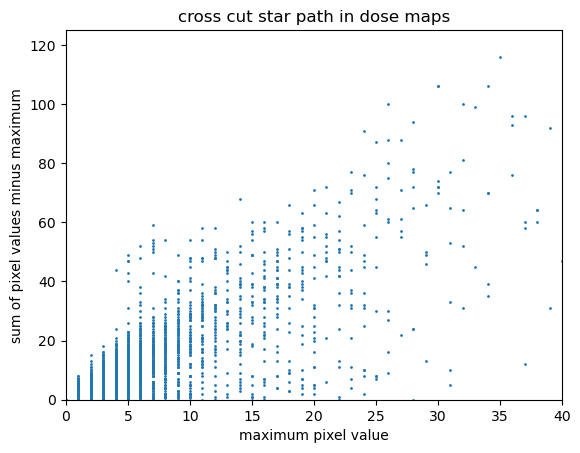

In [4]:
plt.scatter(df['maxy'],df['rsum'], s=1)
plt.xlim(0,40)
plt.ylim(0,125)
plt.xlabel("maximum pixel value")
plt.ylabel("sum of pixel values minus maximum")
plt.title("cross cut star path in dose maps")

Text(0.5, 1.0, 'cross cut star path in dose maps')

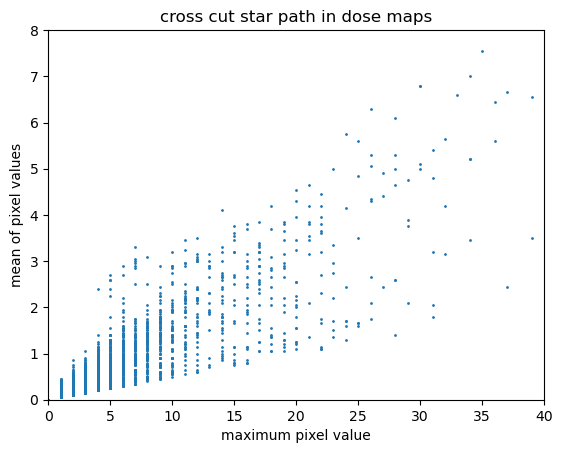

In [74]:
plt.scatter(df['maxy'],df['rmean'], s=1)
plt.xlim(0,40)
plt.ylim(0,8)
plt.xlabel("maximum pixel value")
plt.ylabel("mean of pixel values")
plt.title("cross cut star path in dose maps")

Text(0.5, 1.0, 'cross cut star path in dose maps')

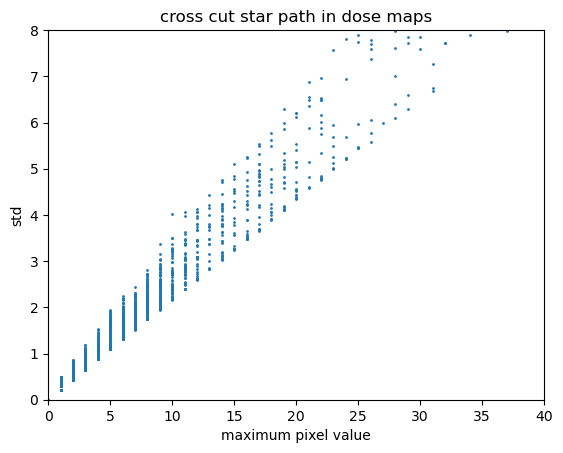

In [82]:
plt.scatter(df['maxy'],df['rstd'], s=1)
plt.xlim(0,40)
plt.ylim(0,8)
plt.xlabel("maximum pixel value")
plt.ylabel("std")
plt.title("cross cut star path in dose maps")

Text(0.5, 1.0, 'cross cut star path in dose maps')

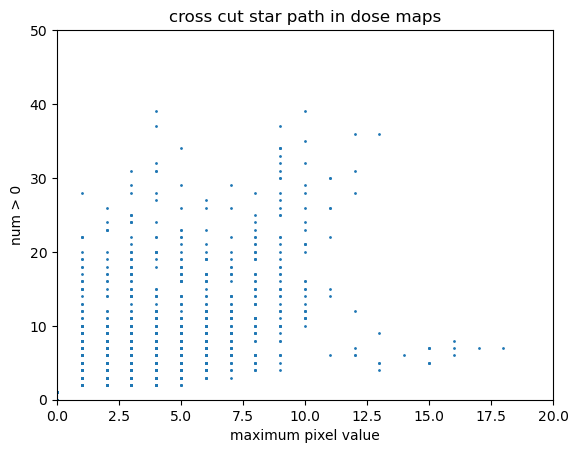

In [102]:
plt.scatter(df['numg0'],df['maxy'], s=1)
plt.xlim(0,20)
plt.ylim(0,50)
plt.xlabel("maximum pixel value")
plt.ylabel("num > 0")
plt.title("cross cut star path in dose maps")

/tmp/ipykernel_6400/2836542690.py:7: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  k = kde.gaussian_kde([x,y])


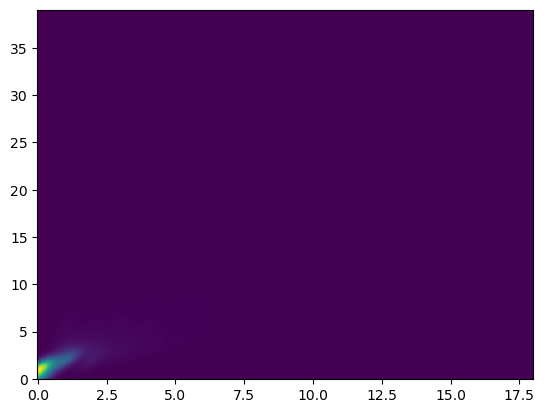

In [101]:
from scipy.stats import kde

x = df['numg0']
y = df['maxy']
# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
nbins=600
k = kde.gaussian_kde([x,y])
xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
 
# Make the plot
plt.pcolormesh(xi, yi, zi.reshape(xi.shape), shading='auto')
plt.show()

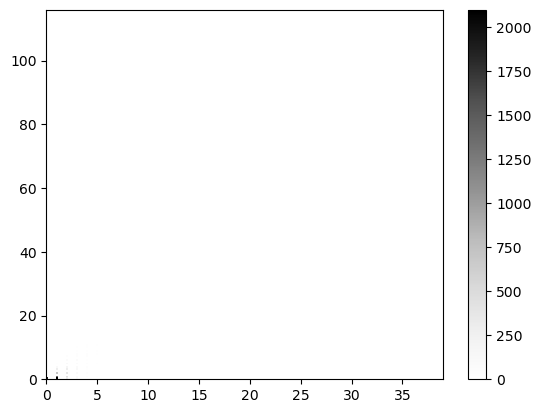

In [97]:
plt.hist2d(x, y, bins=(200, 200), cmap=plt.cm.Greys)
plt.colorbar()